# Crime and Weather-ment

Will an increase in certain weather conditions be statistically related to increases in crime?

In [113]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as stats



crime_2019=pd.read_csv("data/Crime_Data_2019.csv") #2019- 2021
louisville_weather=pd.read_csv("data/2451549.csv") #Weather from 1-1-1997 til 2-9-2021

# print(crime_2019.describe())

num_crime_reports = len(crime_2019)
print("The number of crime reports: ", num_crime_reports)

list_of_crime_types = crime_2019.CRIME_TYPE.unique()


total_counts = crime_2019['CRIME_TYPE'].value_counts()

# crime_2019


The number of crime reports:  148863


In [85]:
total_counts

ASSAULT                     31201
THEFT/LARCENY               26797
OTHER                       17429
DRUGS/ALCOHOL VIOLATIONS    14249
VEHICLE BREAK-IN/THEFT      13865
VANDALISM                   12096
BURGLARY                     9821
MOTOR VEHICLE THEFT          9136
FRAUD                        7413
ROBBERY                      2409
WEAPONS                      2092
SEX CRIMES                    999
DISTURBING THE PEACE          863
HOMICIDE                      288
ARSON                         198
DUI                             7
Name: CRIME_TYPE, dtype: int64

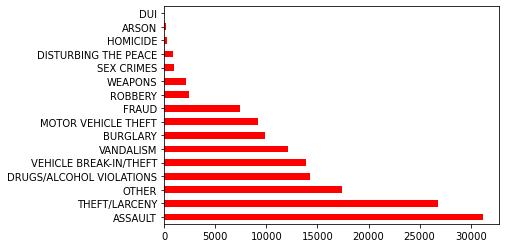

In [77]:
total_counts.plot.barh(x='Number of crimes', color='red' )

In [167]:
#Strips the time from date/time
crime_2019['DATE_OCCURED_NOTIME'] = crime_2019['DATE_OCCURED'].str.split(' ').str[0]
# crime_2019['DATE_OCCURED_NOTIME']

In [168]:
louisville_weather['PRCP'].describe()   #describe precipitation column
# louisville_weather['DATE']


count    8803.000000
mean        0.148638
std         0.400267
min         0.000000
25%         0.000000
50%         0.000000
75%         0.070000
max        10.480000
Name: PRCP, dtype: float64

In [169]:
# louisville_weather.describe()
louisville_weather.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'MDPR',
       'MDPR_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES',
       'SNWD', 'SNWD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 'TOBS', 'TOBS_ATTRIBUTES', 'WESD', 'WESD_ATTRIBUTES',
       'WT01', 'WT01_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT11', 'WT11_ATTRIBUTES'],
      dtype='object')

In [121]:
date_crime_count_df = louisville_weather[['DATE','PRCP','SNOW','TMAX','TMIN']].iloc[8035:8400]
date_crime_count_df

,DATE,PRCP,SNOW,TMAX,TMIN
8035,2019-01-01,0.00,0.0,53.0,41.0
8036,2019-01-02,0.00,0.0,43.0,39.0
8037,2019-01-03,0.00,0.0,43.0,35.0
8038,2019-01-04,0.69,0.0,46.0,35.0
8039,2019-01-05,0.01,0.0,56.0,35.0
...,...,...,...,...,...
8395,2019-12-27,0.00,0.0,61.0,51.0
8396,2019-12-28,0.01,0.0,61.0,50.0
8397,2019-12-29,1.77,0.0,62.0,53.0
8398,2019-12-30,0.13,0.0,55.0,37.0


In [210]:
crime_series=[]
assault_series=[]
arson_series=[]
for date in date_crime_count_df['DATE']:
    new_crime_method.append((crime_2019['DATE_OCCURED_NOTIME']==date).sum())
    assault_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="ASSAULT") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))
    arson_series.append(len(crime_2019[(crime_2019['CRIME_TYPE']=="ARSON") & (crime_2019['DATE_OCCURED_NOTIME']==date)]))

print(len(arson_series))


365


In [156]:
#get crime count per date
crime_series=[]
ASSAULT_series=[]
THEFT_LARCENY_series=[]
OTHER_series=[]
DRUGS_ALCOHOL_VIOLATIONS_series=[]
VEHICLE_BREAK_IN_THEFT_series=[]
VANDALISM_series=[]
BURGLARY_series=[]
MOTOR_VEHICLE_THEFT_series=[]
FRAUD_series=[]
ROBBERY_series=[]
WEAPONS_series=[]
SEX_CRIMES_series=[]
DISTURBING_THE_PEACE_series=[]
HOMICIDE_series=[]
ARSON_series=[]
DUI_series =[]                    
for date in date_crime_count_df['DATE']:
    number_of_crimes_per_day = 0
    ASSAULT=0
    THEFT_LARCENY=0
    OTHER=0
    DRUGS_ALCOHOL_VIOLATIONS=0
    VEHICLE_BREAK_IN_THEFT=0
    VANDALISM=0
    BURGLARY=0
    MOTOR_VEHICLE_THEFT=0
    FRAUD=0
    ROBBERY=0
    WEAPONS=0
    SEX_CRIMES=0
    DISTURBING=0
    HOMICIDE=0
    ARSON=0
    DUI=0
    for dateOccured in crime_2019['DATE_OCCURED_NOTIME']:
        if date == dateOccured:
            number_of_crimes_per_day += 1
            if crime_2019['CRIME_TYPE'].str == 'ASSAULT':
                ASSAULT+=1


# ASSAULT                     31201
# THEFT/LARCENY               26797
# OTHER                       17429
# DRUGS/ALCOHOL VIOLATIONS    14249
# VEHICLE BREAK-IN/THEFT      13865
# VANDALISM                   12096
# BURGLARY                     9821
# MOTOR VEHICLE THEFT          9136
# FRAUD                        7413
# ROBBERY                      2409
# WEAPONS                      2092
# SEX CRIMES                    999
# DISTURBING THE PEACE          863
# HOMICIDE                      288
# ARSON                         198
# DUI                             7








    crime_series.append(number_of_crimes_per_day)
    ASSAULT.append(ASSAULT)
    THEFT_LARCENY_series.append(THEFT_LARCENY)
    OTHER_series.append(OTHER)
    DRUGS_ALCOHOL_VIOLATIONS_series.append(DRUGS_ALCOHOL_VIOLATIONS)
    VEHICLE_BREAK_IN_THEFT_series.append(VEHICLE_BREAK_IN_THEFT)
    VANDALISM_series.append(VANDALISM)
    BURGLARY_series.append(BURGLARY)
    MOTOR_VEHICLE_THEFT_series.append(MOTOR_VEHICLE_THEFT)
    FRAUD_series.append(FRAUD)
    ROBBERY_series.append(ROBBERY)
    WEAPONS_series.append(WEAPONS)
    SEX_CRIMES_series.append(SEX_CRIMES)
    DISTURBING_THE_PEACE_series.append(DISTURBING)
    HOMICIDE_series.append(HOMICIDE)
    ARSON_series.append(HOMICIDE)
    DUI_series.append(DUI)




AttributeError: 'int' object has no attribute 'append'

In [209]:
date_crime_count_df['NUMBER_OF_CRIMES'] = crime_series
date_crime_count_df['ASSAULT'] = assault_series
date_crime_count_df['ARSON'] = arson_series



ValueError: Length of values does not match length of index

In [125]:
date_crime_count_df

,DATE,PRCP,SNOW,TMAX,TMIN,NUMBER_OF_CRIMES
8035,2019-01-01,0.00,0.0,53.0,41.0,311
8036,2019-01-02,0.00,0.0,43.0,39.0,204
8037,2019-01-03,0.00,0.0,43.0,35.0,206
8038,2019-01-04,0.69,0.0,46.0,35.0,188
8039,2019-01-05,0.01,0.0,56.0,35.0,222
...,...,...,...,...,...,...
8395,2019-12-27,0.00,0.0,61.0,51.0,164
8396,2019-12-28,0.01,0.0,61.0,50.0,155
8397,2019-12-29,1.77,0.0,62.0,53.0,134
8398,2019-12-30,0.13,0.0,55.0,37.0,234


(-0.15489919898352095, 0.003006009773763343)


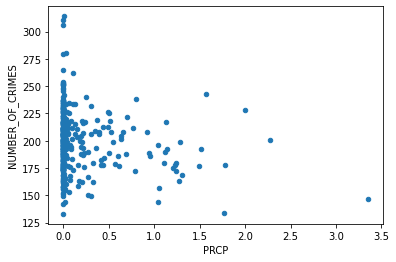

In [140]:
#What is the correlation between precipitation amounts and number of crimes per day
print(stats.pearsonr(date_crime_count_df['PRCP'],date_crime_count_df['NUMBER_OF_CRIMES']))
#precipitation/crimes
date_crime_count_df.plot(x='PRCP', y='NUMBER_OF_CRIMES', kind='scatter', )

(-0.11538553419995644, 0.02750723966745204)


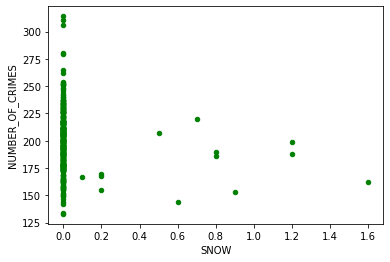

In [134]:
#What is the correlation between snow amounts and number of crimes per day
print(stats.pearsonr(date_crime_count_df['SNOW'],date_crime_count_df['NUMBER_OF_CRIMES']))
#Scatter plot for snow and number of crimes
date_crime_count_df.plot(x='SNOW', y='NUMBER_OF_CRIMES', kind='scatter', color='green', )

(0.21420421058214273, 3.686117620142633e-05)


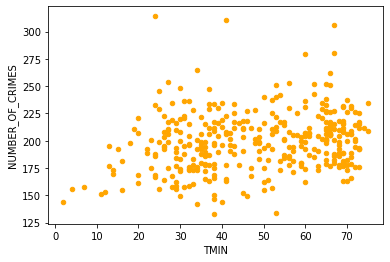

In [136]:
#What is the correlation between TMIN and number of crimes per day
print(stats.pearsonr(date_crime_count_df['TMIN'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMIN', y='NUMBER_OF_CRIMES', kind='scatter', color='orange', )

(0.2066473553239831, 6.965415530183694e-05)


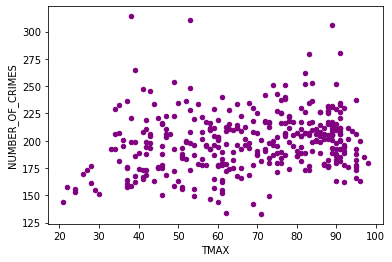

In [139]:
#What is the correlation between TMAX and number of crimes per day
print(stats.pearsonr(date_crime_count_df['TMAX'],date_crime_count_df['NUMBER_OF_CRIMES']))
date_crime_count_df.plot(x='TMAX', y='NUMBER_OF_CRIMES', kind='scatter', color='purple', )